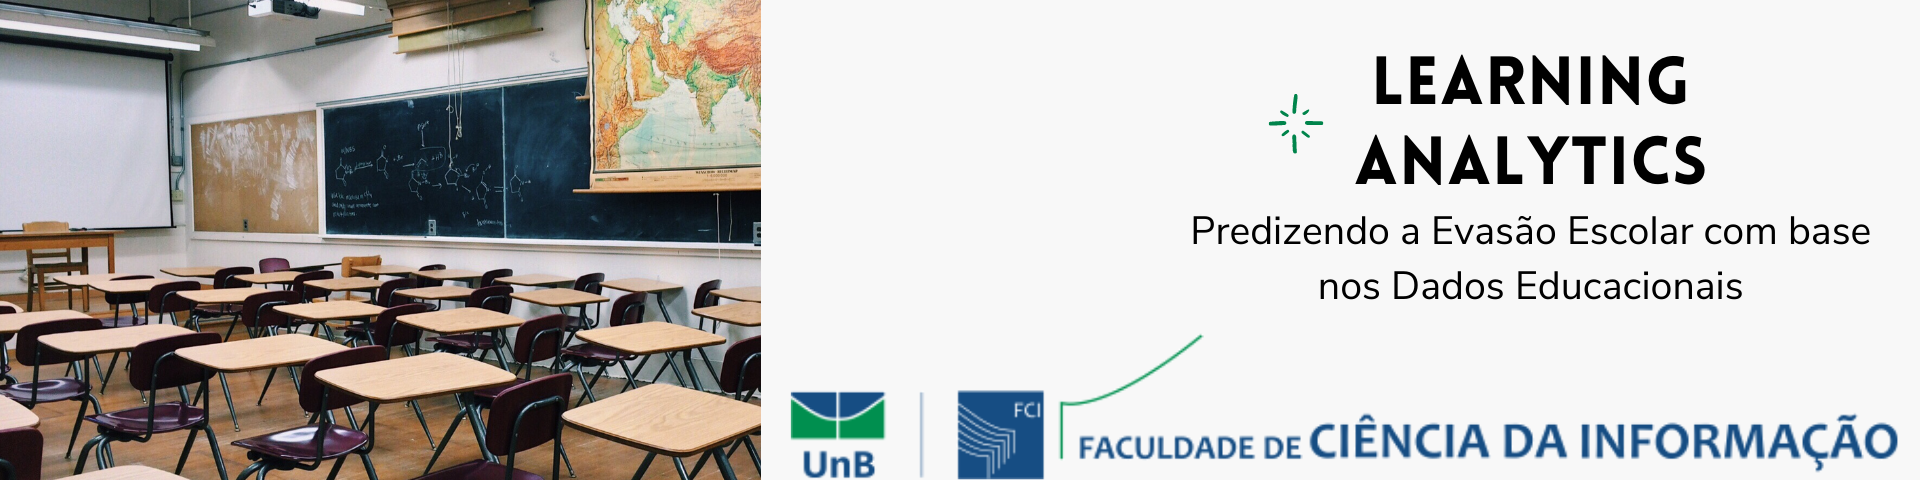


```
# Isto está formatado como código
```

# Learning Analytics: Predizendo a Evasão Escolar com Base nos Dados Educacionais  *Learning Analytics: Predicting School Dropout based on Educational Data*

Os dados são provenientes do Portal de Dados Abertos do Governo Federal podendo ser acessado neste [link](https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados).

Assim como, os dados sociodemográficos do PNAD, podendo serem acessados neste [link](https://www.ibge.gov.br/estatisticas/sociais/trabalho/17270-pnad-continua.html?=&t=downloads)

As variáveis desse dataset são:


O objeto inicial deste dataset é realizar uma exploração dos dados presentes assim como as análises iniciais. 

1. Importando Bibliotecas Python

In [81]:
import pandas as pd
import numpy as np

#Gráfico
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import r2_score #método para o cálculo do R2
from sklearn.metrics import mean_squared_error #erro absoluto

2. Importando base de dados a ser explorada

In [87]:
#upload do dataset
df = pd.read_csv('/content/dados.csv')

In [13]:
#apresentando as 5 primeiras linhas do dataset
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [14]:
df.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [15]:
df.shape #verifica total do conjunto

(76840, 7)

In [88]:
df.describe() #análise estatística


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [17]:
df.isnull().sum()  #verifica presenca de valores não uniformes


UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [18]:
df.isnull().values.any()


False

In [19]:
df.dtypes


UF                  int64
Sexo                int64
Idade               int64
Cor                 int64
Anos de Estudo      int64
Renda               int64
Altura            float64
dtype: object


**Qual é o Valor Médio Para os Pesos Declarados?**

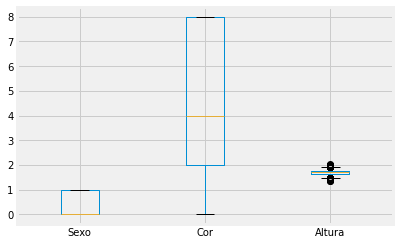

In [23]:
#identificando possíveis outliers
df[['Sexo','Cor', 'Altura']].boxplot()

3. Tratamento e manipulação dos dados¶


In [24]:
# Quantas categorias existem em cada coluna?

for col in df.columns:
  print(col, " :", len(df[col].unique()))

UF  : 27
Sexo  : 2
Idade  : 84
Cor  : 5
Anos de Estudo  : 17
Renda  : 1606
Altura  : 76831


In [59]:
# Atribuindo labels para as categorias da variável UF

Dict_UF = {
    11 : 'Rondônia',
    12 : 'Acre',
    13 : 'Amazonas',
    14 : 'Roraima',
    15 : 'Pará',
    16 : 'Amapá',
    17 : 'Tocantins',
    21 : 'Maranhão',
    22 : 'Piauí',
    23 : 'Ceará',
    24 : 'Rio Grande do Norte',
    25 : 'Paraíba',
    26 : 'Pernambuco',
    27 : 'Alagoas',
    28 : 'Sergipe',
    29 : 'Bahia',
    31 : 'Minas Gerais',
    32 : 'Espírito Santo',
    33 : 'Rio de Janeiro',
    35 : 'São Paulo',
    41 : 'Paraná',
    42 : 'Santa Catarina',
    43 : 'Rio Grande do Sul',
    50 : 'Mato Grosso do Sul',
    51 : 'Mato Grosso',
    52 : 'Goiás',
    53 : 'Distrito Federal'
}

In [61]:
df["UF"] = df["UF"].map(Dict_UF)


In [62]:
# Verificando se os labels foram atribuídos às categorias de UF
df.loc[2000:2005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
2000,NaN,masculino,44,Parda,12,4000,1.67
2001,NaN,masculino,30,Branca,15,3000,1.69
2002,NaN,masculino,59,Parda,0,900,1.90
2003,NaN,masculino,48,Parda,11,2500,1.78
2004,NaN,masculino,59,Preta,15,2500,1.69
2005,NaN,feminino,43,Parda,15,2400,1.65


Tratamento da variável Sexo
A variável sexo precisa de alterações.

Valor 0 é atribuído ao 'masculino'.

Valor 1 é atribuído ao 'feminino'.

In [63]:
# Atribuindo labels para as categorias da variável UF

Dict_Sexo = {
    0 : 'masculino',
    1 : 'feminino'
    }

In [64]:
df["Sexo"] = df["Sexo"].map(Dict_Sexo)


# Tratamento da variável Idade e Tratamento da variável Cor


In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              0 non-null      object 
 1   Sexo            0 non-null      object 
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  object 
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 4.1+ MB


In [66]:
Dict_Cor = {
    0 : 'Indígena',
    2 : 'Branca',
    4 : 'Preta',
    6 : 'Amarela',
    8 : 'Parda',
    9 : 'Sem declaração'
    }

In [67]:
df["Cor"] = df["Cor"].map(Dict_Cor)


In [68]:
# verificando se as alterações foram feitas
df.loc[45000:45005]

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
45000,NaN,NaN,36,NaN,11,3200,1.55
45001,NaN,NaN,38,NaN,11,1650,1.67
45002,NaN,NaN,24,NaN,8,1500,1.62
45003,NaN,NaN,45,NaN,15,2500,1.53
45004,NaN,NaN,66,NaN,8,1300,1.72
45005,NaN,NaN,25,NaN,10,1500,1.58


In [69]:
df.groupby('Cor').mean()


,Idade,Anos de Estudo,Renda,Altura
Cor,,,,


Tratamento da variável Anos de Estudo

In [70]:
df['Anos de Estudo'].value_counts()


11    20848
15    10795
8      7980
4      6729
0      6040
5      4499
3      2891
7      2689
6      2445
10     2118
2      2101
9      1840
12     1836
14     1388
1      1388
13     1253
Name: Anos de Estudo, dtype: int64

In [71]:
Dict_Anos = {
  1 : 0,
  2 : 1,
  3 : 2,
  4 : 3,
  5 : 4,
  6 : 5,
  7 : 6,
  8 : 7,
  9 : 8,
  10 : 9,
  11 : 10,
  12 : 11,
  13 : 12,
  14 : 13,
  15 : 14,
  16 : 15,
  17 : 0
}

In [72]:
df["Anos de Estudo"] = df["Anos de Estudo"].map(Dict_Anos)

In [73]:
# verificando se as mudanças foram feitas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              0 non-null      object 
 1   Sexo            0 non-null      object 
 2   Idade           76840 non-null  int64  
 3   Cor             0 non-null      object 
 4   Anos de Estudo  70800 non-null  float64
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 4.1+ MB


# Tratamento da variável Altura

In [74]:
df['Altura'] = round(df['Altura'], 2)

In [75]:
df.loc[900:905]


,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
900,NaN,NaN,49,NaN,7.0,900,1.68
901,NaN,NaN,40,NaN,2.0,900,1.66
902,NaN,NaN,44,NaN,3.0,700,1.72
903,NaN,NaN,54,NaN,7.0,780,1.79
904,NaN,NaN,53,NaN,7.0,788,1.76
905,NaN,NaN,42,NaN,3.0,850,1.79


# Verificar os tipos de variáveis após os devidos tratamentos¶


In [76]:
df.dtypes


UF                 object
Sexo               object
Idade               int64
Cor                object
Anos de Estudo    float64
Renda               int64
Altura            float64
dtype: object

# Análise Descritiva das variáveis do banco de *dados*

In [77]:
# Resumo das variáveis

df.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

# Análise da variável UF

In [91]:
df["UF"].value_counts()

35    8544
31    7686
43    6322
29    5717
33    5556
15    4449
41    4356
26    3820
52    3478
23    3359
42    2275
13    2206
53    2054
51    1800
21    1787
11    1537
32    1511
50    1440
17    1306
28    1287
25    1274
22    1211
24     973
12     937
27     903
14     540
16     512
Name: UF, dtype: int64

In [90]:
df["UF"].value_counts()

35    8544
31    7686
43    6322
29    5717
33    5556
15    4449
41    4356
26    3820
52    3478
23    3359
42    2275
13    2206
53    2054
51    1800
21    1787
11    1537
32    1511
50    1440
17    1306
28    1287
25    1274
22    1211
24     973
12     937
27     903
14     540
16     512
Name: UF, dtype: int64

Text(0.5, 1.0, 'Frequência de pessoas por UF')

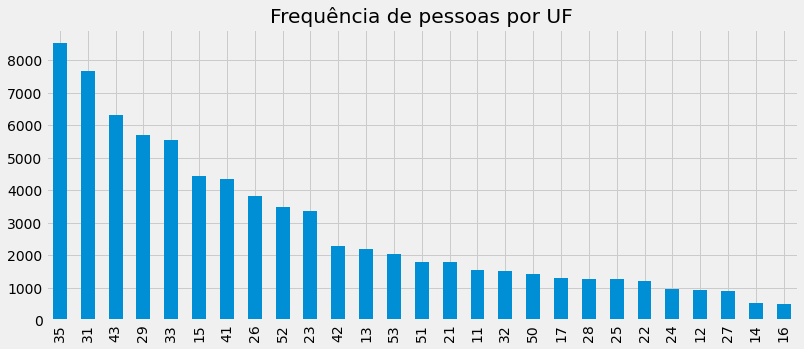

In [89]:
df["UF"].value_counts().plot(kind = 'bar', figsize=(12,5))
plt.title("Frequência de pessoas por UF")

# Análise da variável SEXO

In [85]:
df["Sexo"].value_counts()

Series([], Name: Sexo, dtype: int64)

Text(0.5, 1.0, 'Frequência de pessoas por Sexo')

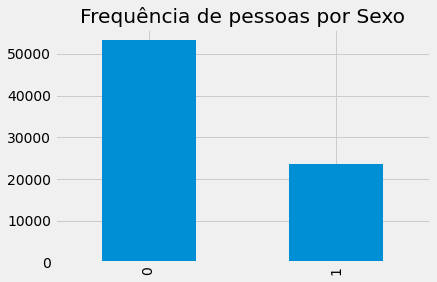

In [92]:
df["Sexo"].value_counts().plot(kind = 'bar')
plt.title("Frequência de pessoas por Sexo")
# 0 para masculino;
# 1 para feminino.

#Análise da variável IDADE

In [ ]:
plt.title("Total de pessoas por Idade")
df["Idade"].plot(kind = 'hist')

In [ ]:
# from 76840 observations, there are 423 that have Age less than 20
len(df["Idade"][df["Idade"]<20])

In [ ]:
print("Idade máxima", df["Idade"].max())
print("Idade mínima", df["Idade"].min())

#Análise da Variável Cor

In [ ]:
df["Cor"].value_counts()

In [ ]:
plt.figure(figsize = (5,5))
plt.title("Number of observations by Cor")
df["Cor"].value_counts().plot(kind = 'bar')

# Análise da variável ANOS DE ESTUDO


In [ ]:
df["Anos de Estudo"].value_counts()

In [ ]:
plt.title("Frequência de pessoas por anos de estudo")
df["Anos de Estudo"].value_counts().plot(kind = 'bar')

In [ ]:
# Anos de estudo por Cor
sns.boxplot(x = df['Cor'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Cor")

In [ ]:
# Anos de estudo por Sexo
sns.boxplot(x = df['Sexo'], y = df['Anos de Estudo'], data = df)
plt.title("Anos de Estudo x Sexo")

In [ ]:
plt.figure(figsize = (10,10))
df.groupby('UF').mean()[['Anos de Estudo']].plot(kind='bar')
plt.title("Média dos anos de estudos por UF")

# Análise da variável RENDA

In [ ]:
plt.title("Distribuição de frequência das rendas")
df["Renda"].value_counts().plot(kind = 'hist')

In [ ]:
df.boxplot(['Renda'])

In [ ]:
df['Renda'].value_counts().sort_index().plot.line()

In [ ]:
df['Log_Renda'] = np.log(df['Renda']) 

In [ ]:
df['Log_Renda'].value_counts().sort_index().plot.line()


In [ ]:
df.head()


In [ ]:
# Some insights
print("Pessoas com Renda < 20 k :", len(df["Renda"][df["Renda"] < 20000]))
print("Pessoas com Renda > 20 k :", len(df["Renda"][df["Renda"] > 20000]))
print("Pessoas com Renda > 40 k :", len(df["Renda"][df["Renda"] > 40000]))
print("\nRenda Média:", round(df['Renda'].mean(), 2))
print("Renda Máxima :", df["Renda"].max())
print("Renda Mínima:", df["Renda"].min())

In [ ]:
# histograma plot com zoom
plt.style.use('seaborn-talk')
fig, ax = plt.subplots(1, 4, figsize = (14, 5))
ax[0].hist(df["Renda"][df["Renda"] < 40000], bins = 100)
ax[0].set_title('Frequência de Rendas (<40k)')
ax[1].hist(df["Renda"][df["Renda"] < 15000], bins = 100)
ax[1].set_title('Frequência de Rendas (<15k)')
ax[2].hist(df["Renda"][df["Renda"] < 10000], bins = 100)
ax[2].set_title('Frequência de Rendas (<10k)')
ax[3].hist(df["Renda"][df["Renda"] < 5000], bins = 100)
ax[3].set_title('Frequência de Rendas (<5k)')

In [ ]:
df["Renda"][df["Renda"] > 40000].plot(kind = 'hist', bins = 100)
plt.title('Frequência de Rendas (>40k)')

In [ ]:
df["Renda"][df["Renda"] <5000].plot(kind = 'hist', bins = 100)
plt.title('Frequência de Rendas (<5k)')